In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Input data files are available in the "../input/" directory.
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results write to the current directory are saved as output.

Importing of lib and input files above.

In [2]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

file_path = r"/Users/diwuyi/Desktop/Sarcasm/train-balanced-sarcasm.csv"

# the following code is for reading the full 1m dataset
train_balanced_sarcasm = pd.read_csv("train-balanced-sarcasm.csv")



FileNotFoundError: ignored

In [82]:
# 100K SIZED 
# the following code is used to generate 100k sized dataset to perform hypothesis testing 
# and to compare with SVM model

dataframe = pd.read_csv("train-balanced-sarcasm.csv")
dataframe.dropna(axis=0, how='any', inplace=True)
#select the rows where labels are non-sarcastic, then choose the first 50000 rows
dataframe_zero = dataframe[dataframe['label']==0]
dataframe_zero = dataframe_zero[0:50000]
#select the rows where labels are sarcastic, then choose the first 50000 rows
dataframe_one = dataframe[dataframe['label']==1]
dataframe_one = dataframe_one[0:50000]
#combine the two sub-dataframe into a balanced training dataset
dataframe_selected = pd.concat([dataframe_zero, dataframe_one], ignore_index = True)
dataframe_selected

Train_X, Test_X, Train_Y, Test_Y = train_test_split(dataframe_selected[['comment', 'subreddit']],dataframe_selected[['label']],test_size=0.2, random_state=42)

# /content/train-balanced-sarcasm.csv


In [5]:
# 1K SIZED 
# the following three lines are for meso-level analysis or subgroup analysis on 1k sized dataset
# training-balanced-sarcasm and testing-balanced-sarcasm are generated from original train-balanced-sarcasm.csv
xls = pd.ExcelFile('balanced-sarcasm_1k.xlsx')
Train = pd.read_excel(xls, 'training-balanced-sarcasm')
Test = pd.read_excel(xls, 'testing-balanced-sarcasm')

The following two cells are for visualisation of current train and test datasets. Depending on the version (1k sized, 100k sized or the whole dataset), uncomment the relevant lines to see the data structure.

In [7]:
# train_balanced_sarcasm

# Train_X
# Test_X
Train
# Test_Y
# Test

,Unnamed: 0,comment,label
0,687,"You know, *in some countries*, women with two ...",1
1,500,But they'll have all those reviews!,1
2,332,This is why mom left,0
3,979,because the president alone creates economic a...,1
4,817,But muh circlejerk,1
...,...,...,...
795,835,Just keeping an eye out for voter fraud,1
796,192,The issue many people have with it is that it ...,0
797,629,"Pretty sure it's a single, uncompressed video ...",1
798,559,"yeah, god forbid jesse look out for his fans b...",1


In [97]:
df1 = train_balanced_sarcasm[['label', 'comment']].dropna()
df1

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.
...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...
1010822,1,"whatever you do, don't vote green!"
1010823,1,Perhaps this is an atheist conspiracy to make ...
1010824,1,The Slavs got their own country - it is called...


The following cell contains hyperparameters for word embeddings. 

In [8]:
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# training_size = int(round(df1['label'].count(), -1) * 0.8)
# print(training_size)

In [85]:
koment1 = Train_X['comment']
koment2 = Train_X['subreddit'].apply(str)
# print(koment2)
# for k in koment2:
#   print(type(k))
# print(len(koment2))
# string_score = []
# for i in range(len(koment2)):
#   print(koment2[i])
#   string_score.append(str(koment2[i]))
# string_score = np.array(string_score)
# string_score = pd.Series(string_score)
# koment = [koment1, koment2]
# koment = pd.concat(koment)
# koment = koment.to_frame()
# koment = koment.applymap(str)
koment = koment1+koment2
print(type(koment))
labels = Train_Y['label']
train_data = koment
train_label = labels
test_data1 = Test_X['comment']
test_data2 = Test_X['subreddit'].apply(str)
# string_score_test = []
# for i in range(len(test_data2)):
#   string_score_test.append(str(test_data2[i]))
# string_score_test = np.array(string_score_test)
# string_score_test = pd.Series(string_score_test)
# test_data = [test_data1, test_data2]
# test_data = pd.concat(test_data)
# test_data = test_data.to_frame()
# test_data = test_data.applymap(str)
test_data = test_data1 + test_data2
test_label = Test_Y['label']
# print(type(koment))

<class 'pandas.core.series.Series'>


In [9]:
# # koment = df1['comment']
koment = Train['comment']
labels = Train['label']
train_data = koment
train_label = labels
test_data = Test['comment']
test_label = Test['label']
# train_data = train_data.where(lambda x : len(x) > 15).dropna()
# print(type(train_data))
# train_data = train_data.loc(len(train_data['comment']) > 15)
# print(type(train_data))
filtered_train_data = []
filtered_train_label = []
for i in range(len(train_data)):
  if len(train_data[i]) > 60:
    continue
  else:
    filtered_train_data.append(train_data[i])
    filtered_train_label.append(train_label[i])

filtered_test_data = []
filtered_test_label = []
for j in range(len(test_data)):
  if len(test_data[j]) > 60:
    continue
  else:
    filtered_test_data.append(test_data[j])
    filtered_test_label.append(test_label[j])
filtered_train_data = np.array(filtered_train_data)
filtered_train_label = np.array(filtered_train_label)
filtered_test_data = np.array(filtered_test_data)
filtered_test_label = np.array(filtered_test_label)
filtered_train_data = pd.Series(filtered_train_data)
filtered_train_label = pd.Series(filtered_train_label)
filtered_test_data = pd.Series(filtered_test_data)
filtered_test_label = pd.Series(filtered_test_label)
# print(len(filtered_train_data))
# print(type(filtered_train_data))
# print(len(filtered_train_data))
# print(len(filtered_test_data))



The following cell contains code for convertin the whole 1m dataset to dataframe.


In [10]:
koment = df1['comment']
labels = df1['label']

train_data = koment[0:training_size]
train_label = labels[0:training_size]
test_data = koment[training_size:]
test_label = labels[training_size:]

NameError: ignored

In [11]:
vocab_size = 8000
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)

word_index = tokenizer.word_index


train_seq = tokenizer.texts_to_sequences(train_data)
train_pad = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(test_data)
test_pad = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
# print(vocab_size)
# print(word_index)

In [12]:
train_seq = np.array(train_seq)
train_pad = np.array(train_pad)
test_seq = np.array(test_seq)
test_pad = np.array(test_pad)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
model = Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64)))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy','Recall','Precision'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              10368     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 138,497
Trainable params: 138,497
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 5
batch_size = 32

history = model.fit(train_pad, train_label, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

Epoch 1/5
23/23 [==============================] - 4s 76ms/step - loss: 0.7043 - accuracy: 0.5069 - recall: 0.4391 - precision: 0.4968 - val_loss: 0.6922 - val_accuracy: 0.5000 - val_recall: 0.4222 - val_precision: 0.5758
Epoch 2/5
23/23 [==============================] - 1s 44ms/step - loss: 0.6732 - accuracy: 0.5875 - recall: 0.5411 - precision: 0.5859 - val_loss: 0.7177 - val_accuracy: 0.4250 - val_recall: 0.2667 - val_precision: 0.4800
Epoch 3/5
23/23 [==============================] - 1s 47ms/step - loss: 0.6336 - accuracy: 0.6625 - recall: 0.6176 - precision: 0.6687 - val_loss: 0.6711 - val_accuracy: 0.5750 - val_recall: 0.6889 - val_precision: 0.6078
Epoch 4/5
23/23 [==============================] - 1s 44ms/step - loss: 0.6409 - accuracy: 0.6375 - recall: 0.5354 - precision: 0.6608 - val_loss: 0.8342 - val_accuracy: 0.5625 - val_recall: 1.0000 - val_precision: 0.5625
Epoch 5/5
23/23 [==============================] - 1s 44ms/step - loss: 0.6245 - accuracy: 0.6917 - recall: 0.69

In [16]:
accr = model.evaluate(test_pad,test_label)

7/7 [==============================] - 0s 12ms/step - loss: 0.6866 - accuracy: 0.5600 - recall: 0.5882 - precision: 0.5660


Explanation for improved model performances on both long and short comments as sub-groups: The filtering of comments allow the model to specialise on the sub group, leading to improvement in performance for both groups. The improvement in short comments group is more significant because the limit on maximum length of comments is unlikely to affect short comments' embedding whereas long comments may get truncated due to the limit.

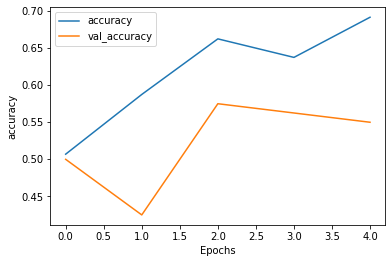

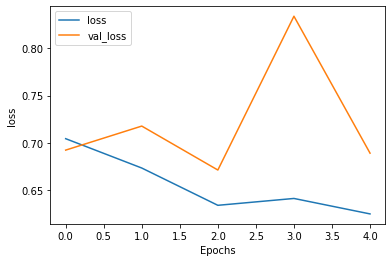

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")